In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/full_dataset_mpv.csv').reset_index(drop=True)
df.head()

/var/folders/dr/d_wys8sx6dj_8v6ssg_x0_qc0000gp/T/ipykernel_24834/2456346419.py:1: DtypeWarning: Columns (4,12,27,30,31,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/full_dataset_mpv.csv').reset_index(drop=True)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,name,age,gender,race,victim_image,date,street_address,...,prosecutor_party,prosecutor_term,prosecutor_in_court,prosecutor_special,independent_investigation,prosecutor_url,text,authors,fu,Unnamed: 68
0,0,0.0,0.0,Clyde E. Young,28.0,Male,White,https://images.revcontent.com/revcontent/image...,2024-02-22,14700 US 67,...,NaN,NaN,NaN,NaN,NaN,NaN,[['A Godfrey man who had been charged with mur...,"[['Mike Koziatek'], []]",NaN,NaN
1,1,1.0,1.0,Jamarcus Brown,35.0,Male,Black,https://bloximages.chicago2.vip.townnews.com/f...,2024-02-21,"U.S. 61, South of MS 3",...,NaN,NaN,NaN,NaN,NaN,NaN,"[['DESOTO COUNTY, Miss. (WMC) - Mississippi Bu...","[[], ['Lakiya Scott'], []]",NaN,NaN
2,2,2.0,2.0,John Daniels,37.0,Male,Unknown race,NaN,2024-02-21,Highway 78 and Shipley Street,...,NaN,NaN,NaN,NaN,NaN,NaN,"[['NORTH CHARLESTON, S.C. (WCSC) - A portion o...","[[], [], []]",NaN,NaN
3,3,3.0,3.0,Name Withheld,NaN,Female,Unknown race,NaN,2024-02-20,11100 Crystal Glen Blvd,...,NaN,NaN,NaN,NaN,NaN,NaN,[['The Florida Department of Law Enforcement i...,"[['Fox News Staff'], ['Amanda Rabines'], [], [...",NaN,NaN
4,4,4.0,4.0,Lucas Barros,42.0,Male,Hispanic,https://cdn.tukioswebsites.com/obituary_profil...,2024-02-20,Vista Dr SW,...,NaN,NaN,NaN,NaN,NaN,NaN,"[['According to New Mexico State Police, Los L...","[['Jonathan Fjeld'], ['Julia M. Dendinger', 'N...",NaN,NaN


In [3]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [4]:
df.date = pd.to_datetime(df['date'])

threshold_date = pd.Timestamp('5/25/2020')
a = df.date > threshold_date
# we get the number of articles after the
print(f"There are {a.sum()} articles produced after George Floyd's protests")
df['after_Floyd'] = a

There are 4621 articles produced after George Floyd's protests


In [5]:
df_selected = df[['name', 'gender','race','age', 'date','after_Floyd', 'city','state', 'county', 'agency_responsible', 'cause_of_death', 'circumstances',
                  'news_urls', 'signs_of_mental_illness','officer_charged', 'allegedly_armed', 'wapo_armed', 'wapo_threat_level', 'wapo_flee',
                  'wapo_body_camera', 'initial_reason','text', 'authors']]

In [6]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12768 entries, 0 to 12767
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     12768 non-null  object        
 1   gender                   12760 non-null  object        
 2   race                     12547 non-null  object        
 3   age                      7836 non-null   object        
 4   date                     12768 non-null  datetime64[ns]
 5   after_Floyd              12768 non-null  bool          
 6   city                     12759 non-null  object        
 7   state                    12768 non-null  object        
 8   county                   12758 non-null  object        
 9   agency_responsible       12745 non-null  object        
 10  cause_of_death           12760 non-null  object        
 11  circumstances            12741 non-null  object        
 12  news_urls                12766 n

In [7]:
df_selected.text.describe()


count     12765
unique     8526
top          []
freq       3321
Name: text, dtype: object

In [8]:
df_selected = df_selected[df_selected.text != '[]']
df_selected = df_selected[df_selected.text != "[['']]"]
df_selected.reset_index(inplace=True, drop=True)

In [9]:
df_selected.text[df_selected.text.isna()].unique()

array([nan], dtype=object)

In [10]:
df_selected.dropna(subset= 'text',inplace = True)

In [11]:
import ast
df_selected.text = df_selected.text.apply(ast.literal_eval)
df_selected = df_selected.explode('text')
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16730 entries, 0 to 9204
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     16730 non-null  object        
 1   gender                   16716 non-null  object        
 2   race                     16172 non-null  object        
 3   age                      12888 non-null  object        
 4   date                     16730 non-null  datetime64[ns]
 5   after_Floyd              16730 non-null  bool          
 6   city                     16723 non-null  object        
 7   state                    16730 non-null  object        
 8   county                   16705 non-null  object        
 9   agency_responsible       16695 non-null  object        
 10  cause_of_death           16707 non-null  object        
 11  circumstances            16702 non-null  object        
 12  news_urls                16730 non-nul

In [12]:
df_selected.reset_index(inplace = True, drop = True)

In [13]:
df_selected['text'] = df_selected['text'].apply(str)
df_selected['text'].head()

0    ['A Godfrey man who had been charged with murd...
1    ['The man, identified as Clyde Young, was char...
2    ['DESOTO COUNTY, Miss. (WMC) - Mississippi Bur...
3    ['Close Get email notifications on {{subject}}...
4    ['The Carlos Moore Law Group said it has been ...
Name: text, dtype: object

In [14]:
df_selected['text'][0]

"['A Godfrey man who had been charged with murder in the shooting death of a woman inside a truck in Missouri died Thursday during a standoff with police in West Alton, Missouri.\\n\\nAmy Lynn Delacruz, 41, of Cadet, Missouri, was identified as the victim found in the truck, according to Cpl. Barry Bayles of the St. Charles County, Missouri, Police Department.\\n\\nHer body was found early Thursday in a tractor-trailer in Floristell, Missouri, according to court records.\\n\\nClyde E. Young, 28, of Godfrey, died during a standoff with police at a gas station on U.S. 67 in West Alton, Missouri, near the Clark Bridge over the Mississippi River, police said.\\n\\nBayles said investigators were trying to determine whether Young was shot by police or if he died from a self-inflicted gunshot.\\n\\nYoung had called 911 to say his girlfriend was shot in the truck in Floristell, according to a probable cause statement filed in St. Charles County court by the St. Charles Police Department. Young

In [15]:
df_selected['TextColumn'] = df_selected['text'].str.replace(r'\\n\\n', ' ', regex=True)
df_selected['TextColumn'] = df_selected['TextColumn'].str.replace(r'[^a-zA-Z\s]', ' ', regex=True)
df_selected['TextColumn'] = df_selected['TextColumn'].str.lower()
#df_selected['TextColumn'] = df_selected['TextColumn'].str.replace(r'[0-9]', 'XXX', regex=True)

In [16]:
df_selected['text'][5]

"['NORTH CHARLESTON, S.C. (WCSC) - A portion of Highway 78 is closed as law enforcement investigates an officer-involved shooting Wednesday night.\\n\\nAround 9:30 p.m., North Charleston Police officers were involved in a “brief” vehicle pursuit that ended near the intersection of Highway 78 and Shipley Street, Chief Greg Gomes said in a statement.\\n\\nAt 10:18 p.m., the North Charleston Police Department posted on Twitter that Highway 78 between Shipley Street and Ladson Road was closed after an incident.\\n\\nTraffic alert! Highway 78 between Shipley Street and Ladson Road is closed until further notice due to an incident. #chstrfc #chsnews pic.twitter.com/8AuMXyDcvL — North Charleston Police (@NCPD) February 22, 2024\\n\\nGomes said the sole occupant of the vehicle involved in the chase fled on foot during which shots were fired.\\n\\nThe South Carolina Law Enforcement Division is investigating the shooting, which is standard procedure.\\n\\nGomes said all officers involved in the 

In [17]:
df_selected['TextColumn'][5]

'  north charleston  s c   wcsc    a portion of highway    is closed as law enforcement investigates an officer involved shooting wednesday night  around      p m   north charleston police officers were involved in a  brief  vehicle pursuit that ended near the intersection of highway    and shipley street  chief greg gomes said in a statement  at       p m   the north charleston police department posted on twitter that highway    between shipley street and ladson road was closed after an incident  traffic alert  highway    between shipley street and ladson road is closed until further notice due to an incident   chstrfc  chsnews pic twitter com  aumxydcvl   north charleston police   ncpd  february          gomes said the sole occupant of the vehicle involved in the chase fled on foot during which shots were fired  the south carolina law enforcement division is investigating the shooting  which is standard procedure  gomes said all officers involved in the shooting have been placed on a

# Tokenization and Stopword Removal

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords') #  needed for filtering out noise in the text
nltk.download('punkt')  # necessary for correctly splitting the text into words or sentences

stop_words = set(stopwords.words('english'))

df_selected['tokens'] = df_selected['TextColumn'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words and word.isalpha()])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gigimancinelli./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gigimancinelli./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df_selected['tokens'][0]

['godfrey',
 'man',
 'charged',
 'murder',
 'shooting',
 'death',
 'woman',
 'inside',
 'truck',
 'missouri',
 'died',
 'thursday',
 'standoff',
 'police',
 'west',
 'alton',
 'missouri',
 'amy',
 'lynn',
 'delacruz',
 'cadet',
 'missouri',
 'identified',
 'victim',
 'found',
 'truck',
 'according',
 'cpl',
 'barry',
 'bayles',
 'st',
 'charles',
 'county',
 'missouri',
 'police',
 'department',
 'body',
 'found',
 'early',
 'thursday',
 'tractor',
 'trailer',
 'floristell',
 'missouri',
 'according',
 'court',
 'records',
 'clyde',
 'e',
 'young',
 'godfrey',
 'died',
 'standoff',
 'police',
 'gas',
 'station',
 'u',
 'west',
 'alton',
 'missouri',
 'near',
 'clark',
 'bridge',
 'mississippi',
 'river',
 'police',
 'said',
 'bayles',
 'said',
 'investigators',
 'trying',
 'determine',
 'whether',
 'young',
 'shot',
 'police',
 'died',
 'self',
 'inflicted',
 'gunshot',
 'young',
 'called',
 'say',
 'girlfriend',
 'shot',
 'truck',
 'floristell',
 'according',
 'probable',
 'cause',
 '

# Frequency Analysis: Unigram, Bigram, Trigram

In [20]:
from collections import Counter
from nltk import ngrams

word_counts = Counter([word for sublist in df_selected['tokens'] for word in sublist])
most_common_words = word_counts.most_common(20)
print(most_common_words)

bigram_counts = Counter(ngrams([word for sublist in df_selected['tokens'] for word in sublist], 2))
trigram_counts = Counter(ngrams([word for sublist in df_selected['tokens'] for word in sublist], 3))
print(bigram_counts.most_common(20)) # maybe (('involved', 'shooting'), 7891) more present in cases involving black people
print(trigram_counts.most_common(20)) # maybe (('officer', 'involved', 'shooting'), 5736) more present in cases involving black people

[('police', 86777), ('said', 76291), ('officers', 53879), ('officer', 44851), ('shooting', 33864), ('man', 32834), ('shot', 29709), ('county', 26604), ('suspect', 20829), ('department', 19218), ('investigation', 18302), ('involved', 18097), ('office', 17741), ('according', 17576), ('sheriff', 17169), ('killed', 17142), ('year', 15987), ('one', 15892), ('two', 15376), ('scene', 14878)]
[(('year', 'old'), 11510), (('police', 'department'), 10045), (('involved', 'shooting'), 9235), (('police', 'said'), 9110), (('county', 'sheriff'), 8902), (('officer', 'involved'), 8589), (('sheriff', 'office'), 7981), (('shot', 'killed'), 7687), (('law', 'enforcement'), 7229), (('police', 'officer'), 6637), (('police', 'officers'), 5674), (('state', 'police'), 4896), (('police', 'say'), 4170), (('district', 'attorney'), 4133), (('pronounced', 'dead'), 3685), (('administrative', 'leave'), 3584), (('attorney', 'office'), 3087), (('fatally', 'shot'), 3078), (('said', 'officers'), 3039), (('around', 'p'), 27

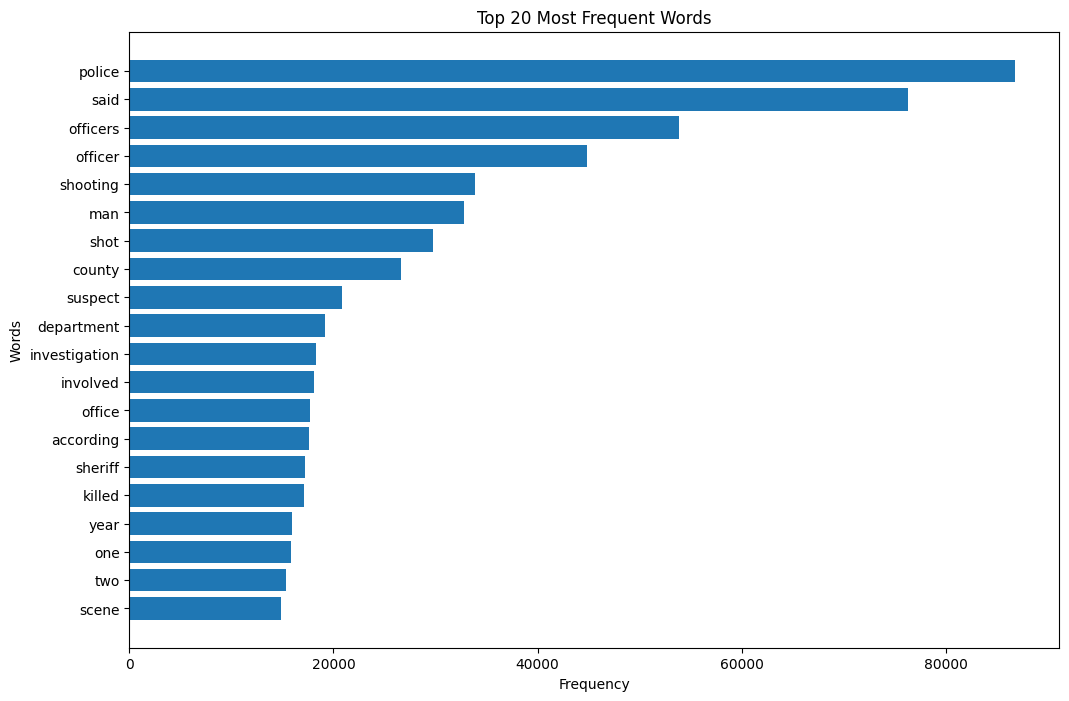

In [21]:
import matplotlib.pyplot as plt 
common_words = word_counts.most_common(20)
words_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(12, 8))
plt.barh(words_df['word'], words_df['count'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()

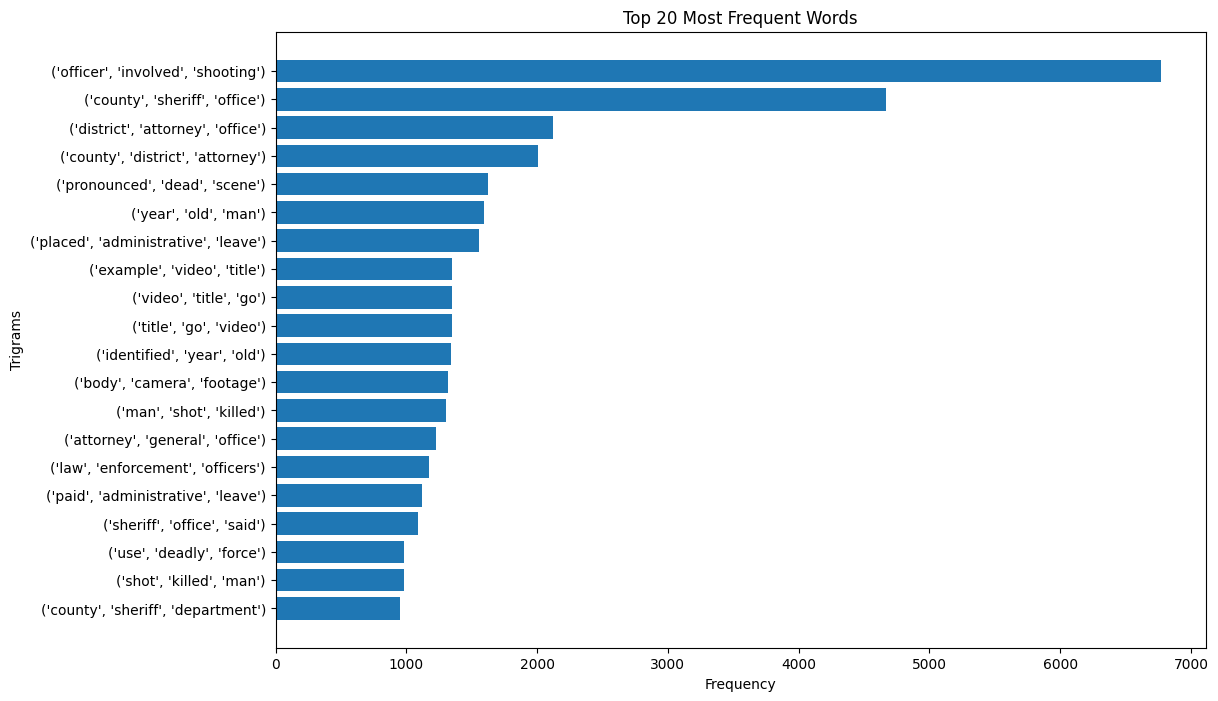

In [22]:
#common_words = word_counts.most_common(20)
common_words = trigram_counts.most_common(20)
words_df = pd.DataFrame(common_words, columns=['word', 'count'])
trigs = [str(trig) for trig in words_df['word']]
plt.figure(figsize=(12, 8))
plt.barh(trigs, words_df['count'])
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()

# Lemmatization



In [23]:
df_selected['race'].unique()

array(['White', 'Black', 'Unknown race', 'Hispanic', 'Asian', nan,
       'Native Hawaiian and Pacific Islander', 'Native American'],
      dtype=object)

In [24]:
import nltk
nltk.download('wordnet')
from nltk.stem import  WordNetLemmatizer
lemmatizer = WordNetLemmatizer()



def lemmatize_text(text):    
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized

df_selected['lemmatized_text'] = df_selected['tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gigimancinelli./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
df_selected['lemmatized_text'][0]

['godfrey',
 'man',
 'charged',
 'murder',
 'shooting',
 'death',
 'woman',
 'inside',
 'truck',
 'missouri',
 'died',
 'thursday',
 'standoff',
 'police',
 'west',
 'alton',
 'missouri',
 'amy',
 'lynn',
 'delacruz',
 'cadet',
 'missouri',
 'identified',
 'victim',
 'found',
 'truck',
 'according',
 'cpl',
 'barry',
 'bayles',
 'st',
 'charles',
 'county',
 'missouri',
 'police',
 'department',
 'body',
 'found',
 'early',
 'thursday',
 'tractor',
 'trailer',
 'floristell',
 'missouri',
 'according',
 'court',
 'record',
 'clyde',
 'e',
 'young',
 'godfrey',
 'died',
 'standoff',
 'police',
 'gas',
 'station',
 'u',
 'west',
 'alton',
 'missouri',
 'near',
 'clark',
 'bridge',
 'mississippi',
 'river',
 'police',
 'said',
 'bayles',
 'said',
 'investigator',
 'trying',
 'determine',
 'whether',
 'young',
 'shot',
 'police',
 'died',
 'self',
 'inflicted',
 'gunshot',
 'young',
 'called',
 'say',
 'girlfriend',
 'shot',
 'truck',
 'floristell',
 'according',
 'probable',
 'cause',
 'st

#  Word Cloud Visualization

In [26]:
%%capture
!pip install wordcloud

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import Text
from nltk.tokenize import word_tokenize

all_text = ' '.join(df_selected['TextColumn'])
tokens = word_tokenize(all_text)
text_obj = Text(tokens)

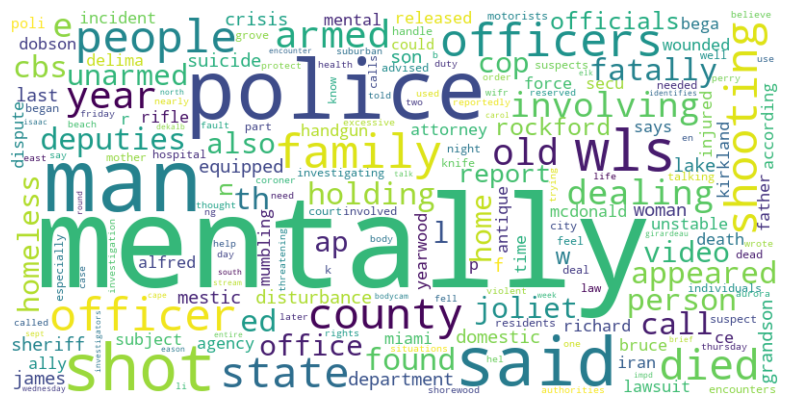

In [28]:
black_collocates = text_obj.concordance_list('ill', width=80, lines=1000) # select the word you are interested in
collocate_words = [word for concordance in black_collocates for word in word_tokenize(concordance.line) if word not in stop_words and 'ill' not in word] # remember to change also here

collocate_count = Counter(collocate_words)
most_common_collocates = collocate_count.most_common(20)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(collocate_count)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# N.B We can do the analysis also for bigram and trigram. See below

# Test for Black

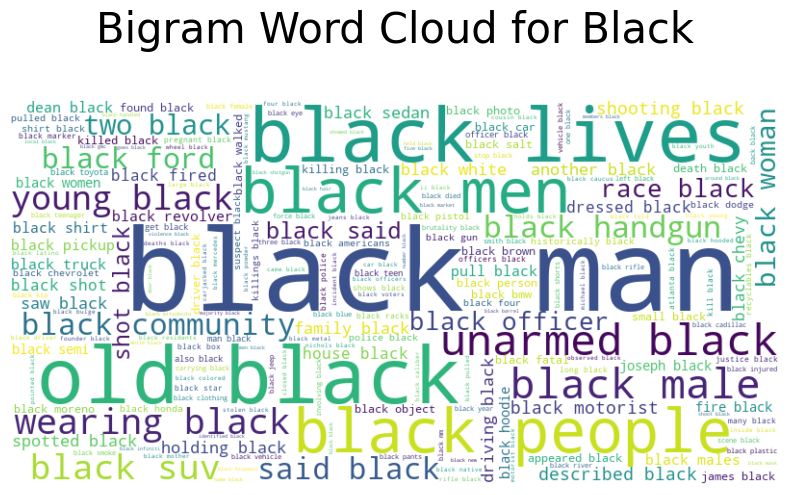

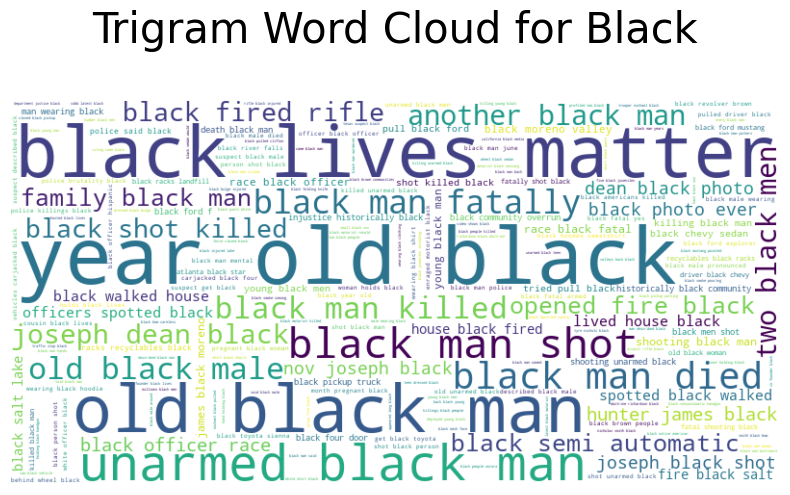

In [29]:
all_tokens = [word for sublist in df_selected['tokens'] for word in sublist]

all_bigrams = list(ngrams(all_tokens, 2))
all_trigrams = list(ngrams(all_tokens, 3))
black_bigrams = [bigram for bigram in all_bigrams if 'black' in bigram]
black_trigrams = [trigram for trigram in all_trigrams if 'black' in trigram]

bigram_counts = Counter(black_bigrams)
trigram_counts = Counter(black_trigrams)

bigram_counts_string = {' '.join(bigram): count for bigram, count in bigram_counts.items()}
trigram_counts_string = {' '.join(trigram): count for trigram, count in trigram_counts.items()}

wordcloud_bigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts_string)

wordcloud_trigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_counts_string)

# Bigram
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Bigram Word Cloud for Black\n', fontsize=30)
plt.show()

print()

# Trigram
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Trigram Word Cloud for Black\n', fontsize=30)
plt.show()

# Test for white

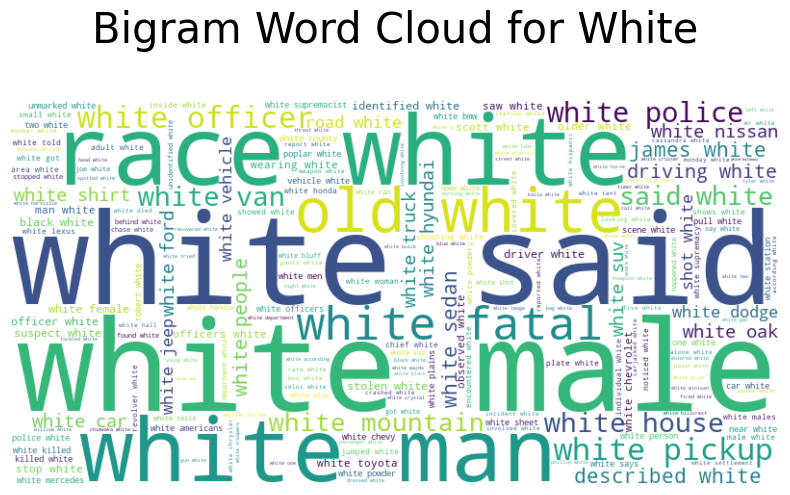

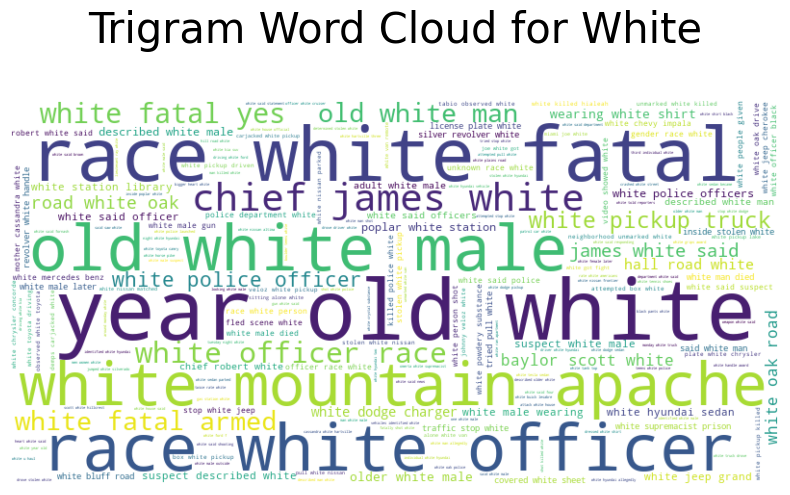

In [30]:
# N.B We can do the analysis also for bigram and trigram
all_tokens = [word for sublist in df_selected['tokens'] for word in sublist]

all_bigrams = list(ngrams(all_tokens, 2))
all_trigrams = list(ngrams(all_tokens, 3))
white_bigrams = [bigram for bigram in all_bigrams if 'white' in bigram]
white_trigrams = [trigram for trigram in all_trigrams if 'white' in trigram]

bigram_counts = Counter(white_bigrams)
trigram_counts = Counter(white_trigrams)

bigram_counts_string = {' '.join(bigram): count for bigram, count in bigram_counts.items()}
trigram_counts_string = {' '.join(trigram): count for trigram, count in trigram_counts.items()}

wordcloud_bigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts_string)

wordcloud_trigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_counts_string)

# Bigram
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Bigram Word Cloud for White\n', fontsize=30)
plt.show()

print()

# Trigram
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Trigram Word Cloud for White\n', fontsize=30)
plt.show()

# Racial Distribution

race
White                                   6616
Black                                   4630
Hispanic                                2702
Unknown race                            1691
Asian                                    246
Native American                          181
Native Hawaiian and Pacific Islander     106
Name: count, dtype: int64


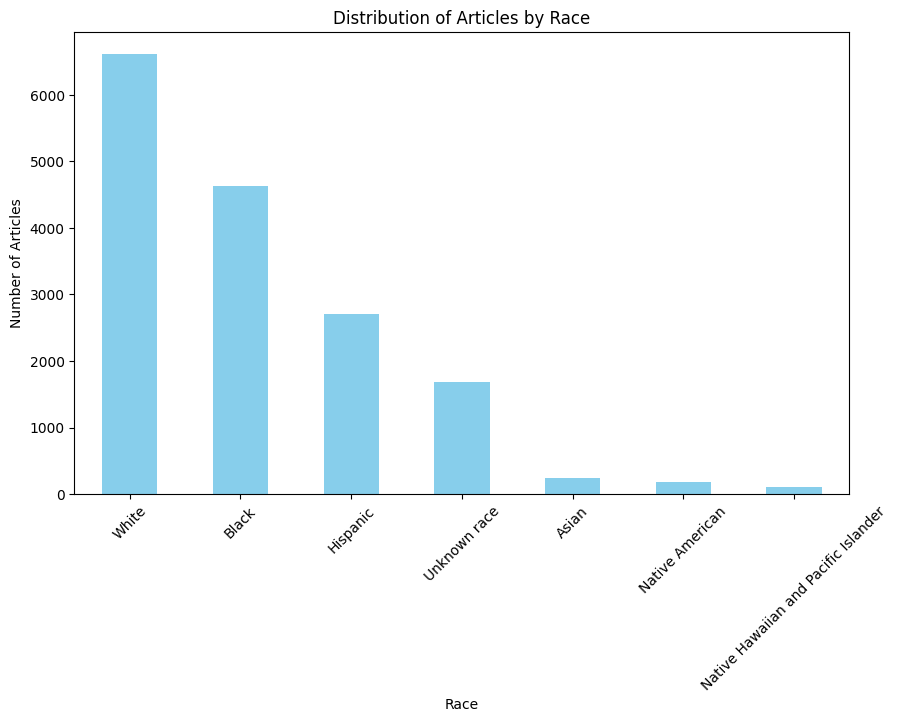

In [31]:
import matplotlib.pyplot as plt
race_counts = df_selected['race'].value_counts()
print(race_counts)

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Articles by Race')
plt.xlabel('Race')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Article Count Over Time

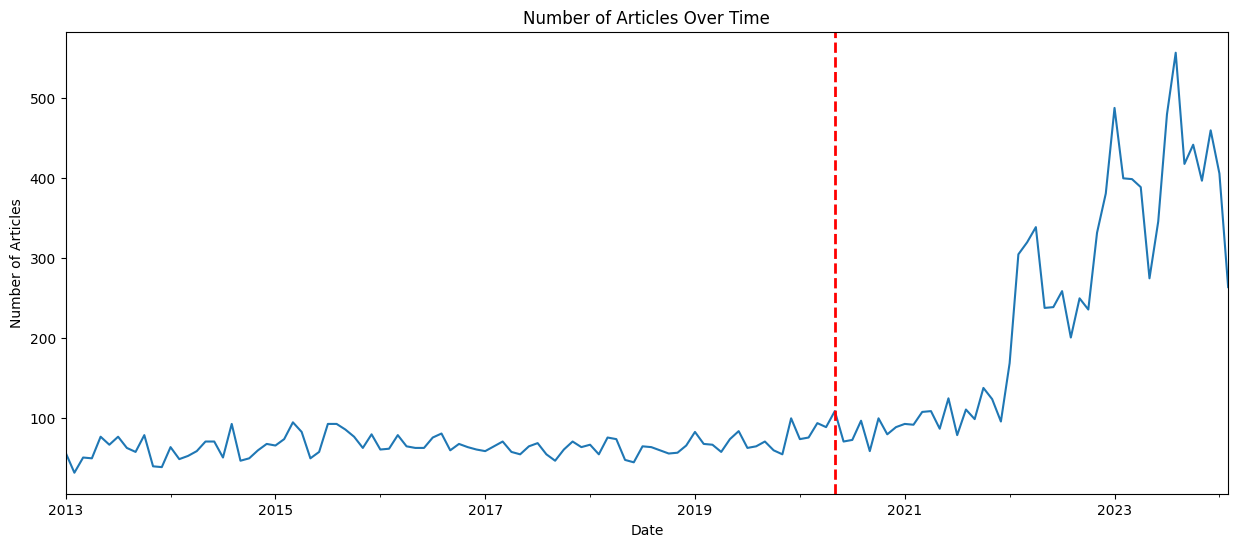

In [32]:
df_selected['date'] = pd.to_datetime(df_selected['date'])

monthly_articles = df_selected.resample('ME', on='date').size()

plt.figure(figsize=(15, 6))
monthly_articles.plot(title='Number of Articles Over Time')
plt.axvline(pd.Timestamp('2020-05-25'), color='red', linestyle='--', linewidth=2, label='George Floyd\'s Death')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# It seems that there is an increasing interest in these articles after 2020.
# maybe it coincides with George Floyd article.

# Article Length Distribution

/var/folders/dr/d_wys8sx6dj_8v6ssg_x0_qc0000gp/T/ipykernel_24834/3926322351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_articles['article_length'] = filtered_articles['TextColumn'].apply(len)


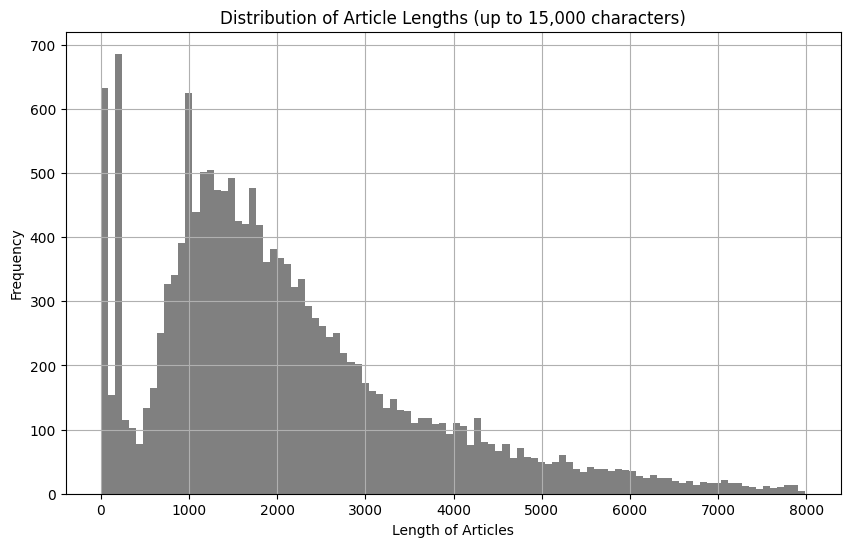

In [33]:
import matplotlib.pyplot as plt

filtered_articles = df_selected[df_selected['TextColumn'].apply(len) <= 8000]
filtered_articles['article_length'] = filtered_articles['TextColumn'].apply(len)

plt.figure(figsize=(10, 6))
filtered_articles['article_length'].hist(bins=100, color='grey')
plt.title('Distribution of Article Lengths (up to 15,000 characters)')
plt.xlabel('Length of Articles')
plt.ylabel('Frequency')
plt.show()

/var/folders/dr/d_wys8sx6dj_8v6ssg_x0_qc0000gp/T/ipykernel_24834/510994940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mentions_violence'] = df_filtered['TextColumn'].str.contains('violence|crime', regex=True, case=False)


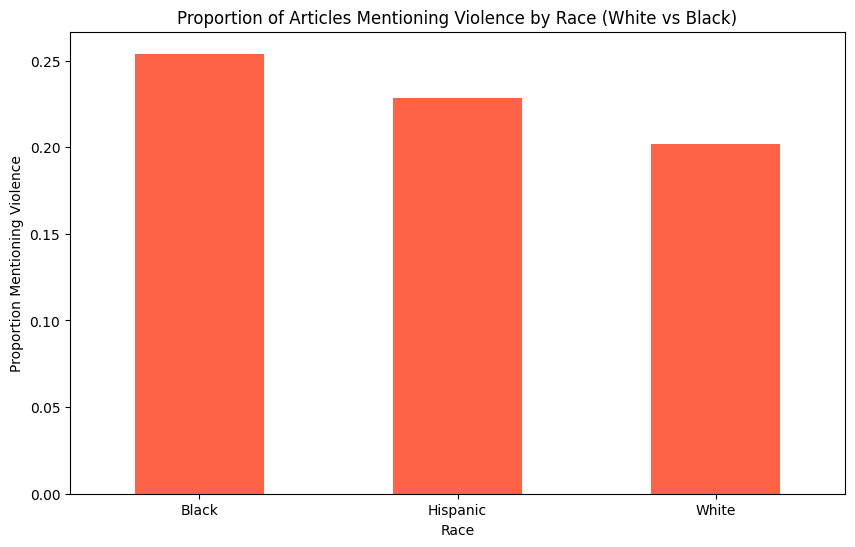

In [34]:
import matplotlib.pyplot as plt
df_filtered = df_selected[df_selected['race'].isin(['White', 'Black', 'Hispanic'])]

df_filtered['mentions_violence'] = df_filtered['TextColumn'].str.contains('violence|crime', regex=True, case=False)

violence_by_race = df_filtered.groupby('race')['mentions_violence'].mean()

plt.figure(figsize=(10, 6))
violence_by_race.plot(kind='bar', color='tomato')
plt.title('Proportion of Articles Mentioning Violence by Race (White vs Black)')
plt.xlabel('Race')
plt.ylabel('Proportion Mentioning Violence')
plt.xticks(rotation=0)
plt.show()

# from here, it seems the the words violence|crime are more present with Black articles

Count of articles by race per state:
race   White  Black
state              
AK        22      7
AL       166    133
AR       128     43
AZ       196     84
CA       542    350
CO       255     82
CT        37     24
DC         6     77
DE        12     33
FL       479    392
GA       208    351
HI         7      6
IA        90     14
ID        80      0
IL       142    189
IN       130    108
KS        77     24
KY       113     57
LA        91    155
MA        67     39
MD        67    150
ME        98      1
MI       168    117
MN        92     83
MO       136     92
MS        70     93
MT        54      3
NC       216    163
ND        26      0
NE        55      5
NH        63      0
NJ        90    128
NM        58     16
NV       134     31
NY       139    216
OH       280    201
OK       196     76
OR       142     36
PA       199    143
RI        14      3
SC        97    112
SD        31      0
TN       201    145
TX       357    335
UT       194      7
VA       132    135
VT 

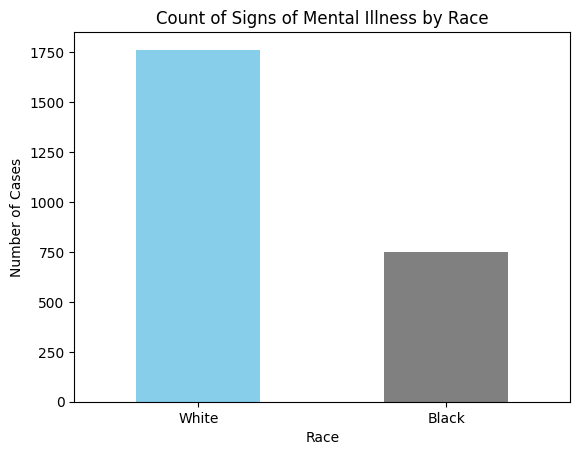

In [35]:
race_state_counts = df_selected.groupby(['state', 'race']).size().unstack(fill_value=0)
print("Count of articles by race per state:")
print(race_state_counts[['White', 'Black']])

mental_illness_counts = df_selected[df_selected['signs_of_mental_illness'] == 'Yes']['race'].value_counts()
print("Count of people with signs of mental illness by race:")
print(mental_illness_counts[['White', 'Black']])

mental_illness_counts[['White', 'Black']].plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Count of Signs of Mental Illness by Race')
plt.xlabel('Race')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.savefig('mental_illness')
plt.show()

In [36]:
%%capture
!pip install geopandas

/var/folders/dr/d_wys8sx6dj_8v6ssg_x0_qc0000gp/T/ipykernel_24834/1906669237.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  race_pivot['Black_to_White_ratio'].fillna(0, inplace=True)


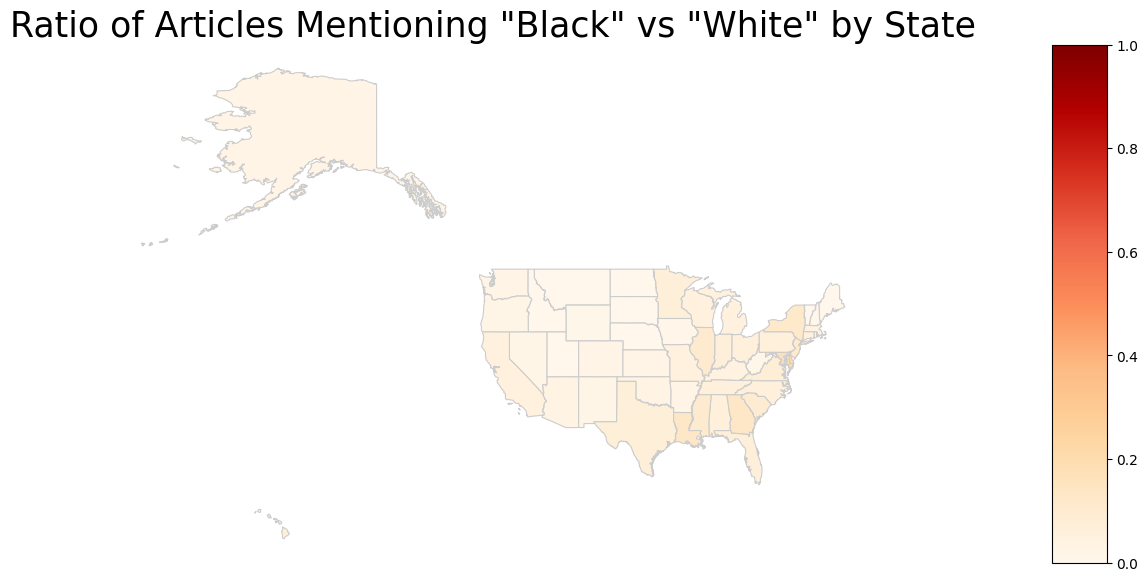

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

usa = gpd.read_file('data/states.shx')
merged_data = usa.merge(df_selected, left_on='STATE_ABBR', right_on='state', how='left')
race_counts_per_state = merged_data.groupby(['state', 'race']).size().reset_index(name='count')

race_pivot = race_counts_per_state.pivot(index='state', columns='race', values='count')
race_pivot.fillna(0, inplace=True)

race_pivot['Black_to_White_ratio'] = race_pivot['Black'] / race_pivot['White']
race_pivot.replace([np.inf, -np.inf], np.nan, inplace=True)
race_pivot['Black_to_White_ratio'].fillna(0, inplace=True)

min_ratio = race_pivot['Black_to_White_ratio'].min()
max_ratio = race_pivot['Black_to_White_ratio'].max()
race_pivot['normalized_Black_to_White_ratio'] = (race_pivot['Black_to_White_ratio'] - min_ratio) / (max_ratio - min_ratio)

usa_with_ratios = usa.merge(race_pivot['normalized_Black_to_White_ratio'], left_on='STATE_ABBR', right_index=True, how='left')

fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

usa_with_ratios.plot(column='normalized_Black_to_White_ratio', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.axis('off')
ax.set_title('Ratio of Articles Mentioning "Black" vs "White" by State', fontdict={'fontsize': '25', 'fontweight' : '3'})

plt.savefig('ratio_colormap')
plt.show()

In [56]:
data = {
    "State": ["District of Columbia", "Mississippi", "Louisiana", "Georgia", "Maryland", "Alabama", "South Carolina",
              "Delaware", "North Carolina", "Virginia", "New York", "Tennessee", "Florida", "Arkansas", "Illinois",
              "Michigan", "New Jersey", "Ohio", "Missouri", "Pennsylvania", "Connecticut", "Texas", "Indiana",
              "Nevada", "Massachusetts", "Kentucky", "Oklahoma", "Rhode Island", "Minnesota", "Wisconsin", "Kansas",
              "California", "Nebraska", "Arizona", "Washington", "Colorado", "Alaska", "Iowa", "West Virginia",
              "North Dakota", "Hawaii", "Oregon", "New Mexico", "South Dakota", "New Hampshire", "Maine", "Vermont",
              "Wyoming", "Utah", "Idaho", "Montana"],
    "Percentage": ["48.49%", "39.08%", "34.23%", "31.4%", "31.27%", "26.23%", "26.04%", "22.44%", "21.8%", "20.57%",
                   "17.44%", "16.85%", "16.26%", "15.99%", "15.64%", "15.18%", "14.33%", "14.17%", "12.62%", "12.62%",
                   "12.58%", "12.38%", "10.68%", "10.52%", "9.43%", "9.37%", "8.92%", "8.34%", "7.76%", "7.45%",
                   "7.34%", "7.22%", "5.92%", "5.67%", "5.43%", "5.23%", "5.07%", "4.86%", "4.8%", "3.63%", "3.58%",
                   "2.95%", "2.95%", "2.8%", "2.3%", "1.99%", "1.91%", "1.83%", "1.71%", "1.07%", "1.05%"]
}

df_population = pd.DataFrame(data)
df_population['Percentage'] = df_population['Percentage'].str.rstrip('%').astype(float) / 100

In [57]:
state_map = {name: abbr for name, abbr in zip(usa['STATE_NAME'], usa['STATE_ABBR'])}
df_population['state'] = df_population['State'].map(state_map)
race_pivot = race_pivot.merge(df_population[['state', 'Percentage']], on='state', how='left')

In [58]:
race_pivot['Black_mentions_per_pct_pop'] = race_pivot['Black'] / (race_pivot['Percentage'] * race_pivot['Black'].sum())
race_pivot['White_mentions_per_pct_pop'] = race_pivot['White'] / ((1 - race_pivot['Percentage']) * race_pivot['White'].sum())

min_val = race_pivot['Black_mentions_per_pct_pop'].min()
max_val = race_pivot['Black_mentions_per_pct_pop'].max()
race_pivot['normalized_mentions_per_pct_pop'] = (race_pivot['Black_mentions_per_pct_pop'] - min_val) / (max_val - min_val)

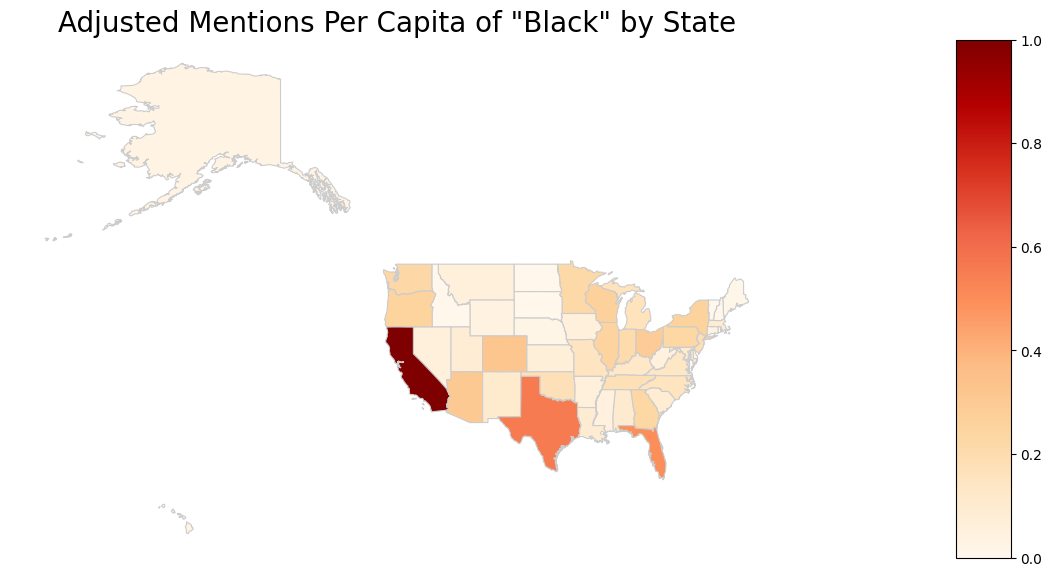

In [59]:
usa_with_ratios = usa.merge(race_pivot[['state', 'normalized_mentions_per_pct_pop']], left_on='STATE_ABBR', right_on='state', how='left')
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
usa_with_ratios.plot(column='normalized_mentions_per_pct_pop', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.axis('off')
ax.set_title('Adjusted Mentions Per Capita of "Black" by State', fontdict={'fontsize': '20', 'fontweight' : '3'})
plt.savefig('ratio_colormap')
plt.show()

In [61]:
top_states = usa_with_ratios.sort_values(by='normalized_mentions_per_pct_pop', ascending=False)
top_5_states = top_states.head(5)
print(top_5_states[['STATE_NAME', 'normalized_mentions_per_pct_pop']])

    STATE_NAME  normalized_mentions_per_pct_pop
24  California                         1.000000
40       Texas                         0.558204
48     Florida                         0.497319
31    Colorado                         0.323431
36     Arizona                         0.305608
